In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mesa_methods as mm

import os
from ipywidgets import interact, IntSlider
from tqdm import tqdm

from celluloid import Camera
import matplotlib as mpl

import pickle as pkl

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:463: SyntaxWarning: invalid escape sequence '\s'
  eig_i = pd.read_table(os.path.join(eig_dir, fname), sep='\s+', skiprows=5)


Updated module 2025-04-14 15:34:10.224201


In [3]:
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                      'figure.figsize': (6.4, 4.8),
                      # 'figure.figsize': (4, 3.8),
                      'xtick.direction': 'in',
                      'ytick.direction': 'in'
                    })

In [ ]:
rrl2_heflash =  mm.model(r'C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_heflash_rrl_v2')

Creating model from directory C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_heflash_rrl_v2
Loading Profiles: 


100%|██████████| 100/100 [00:05<00:00, 17.57it/s]


Loading gyre files: 


100%|██████████| 100/100 [00:03<00:00, 29.40it/s]


In [ ]:
rrl2_ledoux =  mm.model(r'C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_ledoux',
                      gyre_ran=True, gyre_dir='unstablefundamental_v2', nonadiabatic_dir='unstablefundamental_v2')

Creating model from directory C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_ledoux
Loading Profiles: 


100%|██████████| 1100/1100 [01:26<00:00, 12.76it/s]


Loading Frequencies


100%|██████████| 1100/1100 [00:00<00:00, 1444.47it/s]


Loading gyre files: 


100%|██████████| 1100/1100 [00:41<00:00, 26.72it/s]


In [ ]:
rrl2_step01 =  mm.model(r'C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_step_0.1',
                      gyre_ran=True, gyre_dir='unstablefundamental_v2', nonadiabatic_dir='unstablefundamental_v2')

Creating model from directory C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_step_0.1
Loading Profiles: 


100%|██████████| 1518/1518 [01:56<00:00, 13.06it/s]


Loading Frequencies


100%|██████████| 1518/1518 [00:01<00:00, 1129.04it/s]


Loading gyre files: 


100%|██████████| 1518/1518 [01:01<00:00, 24.70it/s]


In [ ]:
rrl2_premix = mm.model(r'C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_premix',
                       gyre_ran=True, gyre_dir='', nonadiabatic_dir='')

Creating model from directory C:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\rrl_ovf_latest\LOGS_rrl2_premix
Loading Profiles: 


100%|██████████| 1758/1758 [02:07<00:00, 13.76it/s]


Loading Frequencies


100%|██████████| 1758/1758 [00:01<00:00, 966.89it/s] 


Loading gyre files: 


100%|██████████| 1758/1758 [01:13<00:00, 24.01it/s]


In [10]:
with open('rrl2_heflash.pkl', 'wb') as f:
    pkl.dump(rrl2_heflash, f)

with open('rrl2_ledoux.pkl', 'wb') as f:
    pkl.dump(rrl2_ledoux, f)

with open('rrl2_step01.pkl', 'wb') as f:
    pkl.dump(rrl2_step01, f)

with open('rrl2_premix.pkl', 'wb') as f:
    pkl.dump(rrl2_premix, f)

In [4]:
with open('rrl2_heflash.pkl', 'rb') as f:
    rrl2_heflash = pkl.load(f)

with open('rrl2_ledoux.pkl', 'rb') as f:
    rrl2_ledoux = pkl.load(f)

with open('rrl2_step01.pkl', 'rb') as f:
    rrl2_step01 = pkl.load(f)

with open('rrl2_premix.pkl', 'rb') as f:
    rrl2_premix = pkl.load(f)

In [42]:

with open('nv_premix.pkl', 'rb') as f:
    nv_premix = pkl.load(f)

with open('ov_f1.pkl', 'rb') as f:
    ov_f1 = pkl.load(f)
        
with open('nv_ledoux.pkl', 'rb') as f:
    nv_ledoux = pkl.load(f)

In [36]:
1/(15*3600) * 10**8

1851.8518518518517

In [29]:
rrl2_premix.freqs[800]

,E_norm,Re(freq),Im(freq),l,n_g,n_p,n_pg
0,2.106910e-06,22.134455,0.024303,0,0,1,1
1,3.461687e-07,29.942839,0.143908,0,0,2,2
2,2.495611e-07,37.945202,-0.015876,0,0,3,3
3,2.422143e-07,46.917755,-0.494383,0,0,4,4
4,2.124363e-07,55.916814,-0.907082,0,0,5,5


In [76]:
c3 = 130.8128
c4 = 261.6256	
c5 = 523.2511
c6 = 1046.502   

rrl2_step01.fundamental_music(duration=0.01, minf=c3, maxf=c5, map='linear',
                               play_overtones=True
                               )

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1369: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]
c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1385: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


In [81]:
colors = ['#264653', '#287271', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1385: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]
c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1369: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


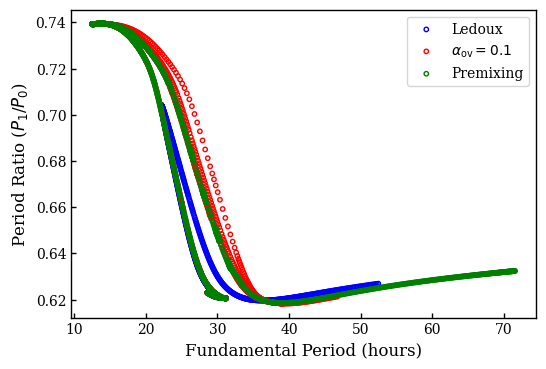

In [92]:
rrl2_ledoux.plot_petersen_firstovertone(label='Ledoux')
rrl2_step01.plot_petersen_firstovertone(c='red', label=r'$\alpha_\mathrm{ov} = 0.1$')
rrl2_premix.plot_petersen_firstovertone(c='green', label='Premixing')

# nv_ledoux.plot_petersen_firstovertone(c=colors[1])
# ov_f1.plot_petersen_firstovertone(c=colors[3])
# nv_premix.plot_petersen_firstovertone(c=colors[0])

plt.legend()

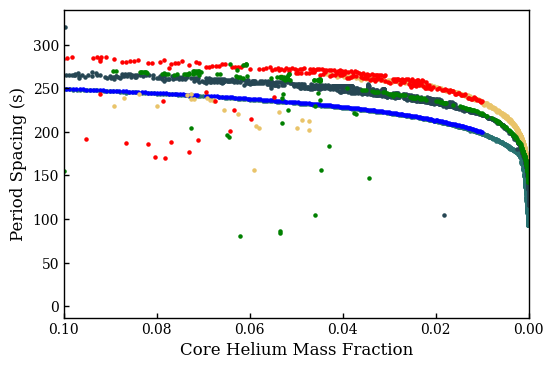

In [84]:
nv_ledoux.plot_pg_vs_yc(c=colors[1])
rrl2_ledoux.plot_pg_vs_yc(c='blue')

ov_f1.plot_pg_vs_yc(c=colors[3])
rrl2_step01.plot_pg_vs_yc(c='red')

nv_premix.plot_pg_vs_yc(c=colors[0])
rrl2_premix.plot_pg_vs_yc(c='green')

plt.xlim(0, 0.1)
plt.gca().invert_xaxis()

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1369: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


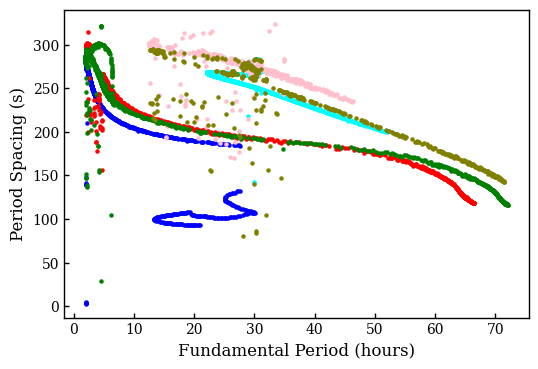

In [45]:
nv_ledoux.plot_pg_vs_fundamental(c='blue')
rrl2_ledoux.plot_pg_vs_fundamental(c='cyan')

ov_f1.plot_pg_vs_fundamental(c='red')
rrl2_step01.plot_pg_vs_fundamental(c='pink')

nv_premix.plot_pg_vs_fundamental(c='green')
rrl2_premix.plot_pg_vs_fundamental(c='olive')

In [49]:
interact(lambda a: rrl2_premix.plot_propagation(a, mass=True), a=IntSlider(min=1, max=len(rrl2_premix.profs)))

interactive(children=(IntSlider(value=1, description='a', max=1758, min=1), Output()), _dom_classes=('widget-i…

<function __main__.<lambda>(a)>

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1369: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


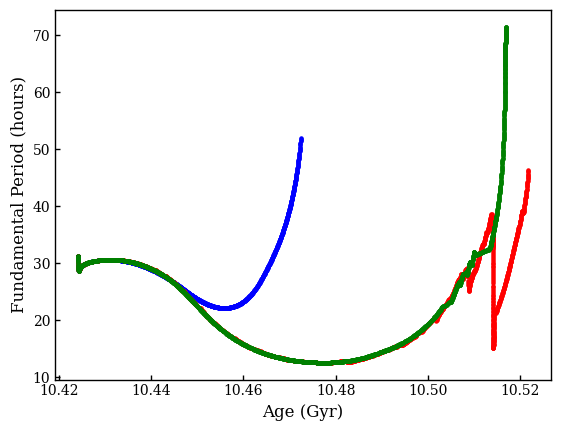

In [5]:
rrl2_ledoux.plot_fundamental(c='blue')
rrl2_step01.plot_fundamental(c='red')
rrl2_premix.plot_fundamental(c='green')

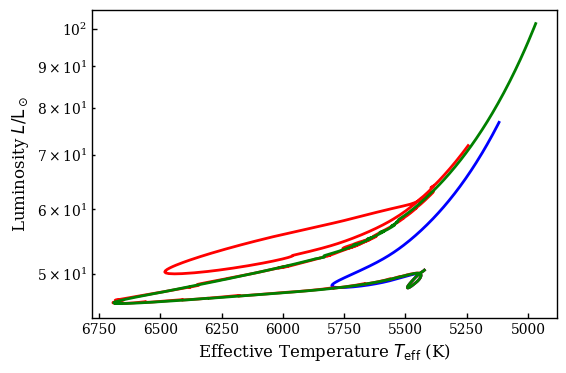

In [58]:
# rrl2_heflash.plot_HR(color='black')

rrl2_ledoux.plot_HR(color='blue')
rrl2_step01.plot_HR(color='red')
rrl2_premix.plot_HR(color='green')
# plt.gca().invert_xaxis()

0.6283791958155059


C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.624092043413205
0.6246754776278167


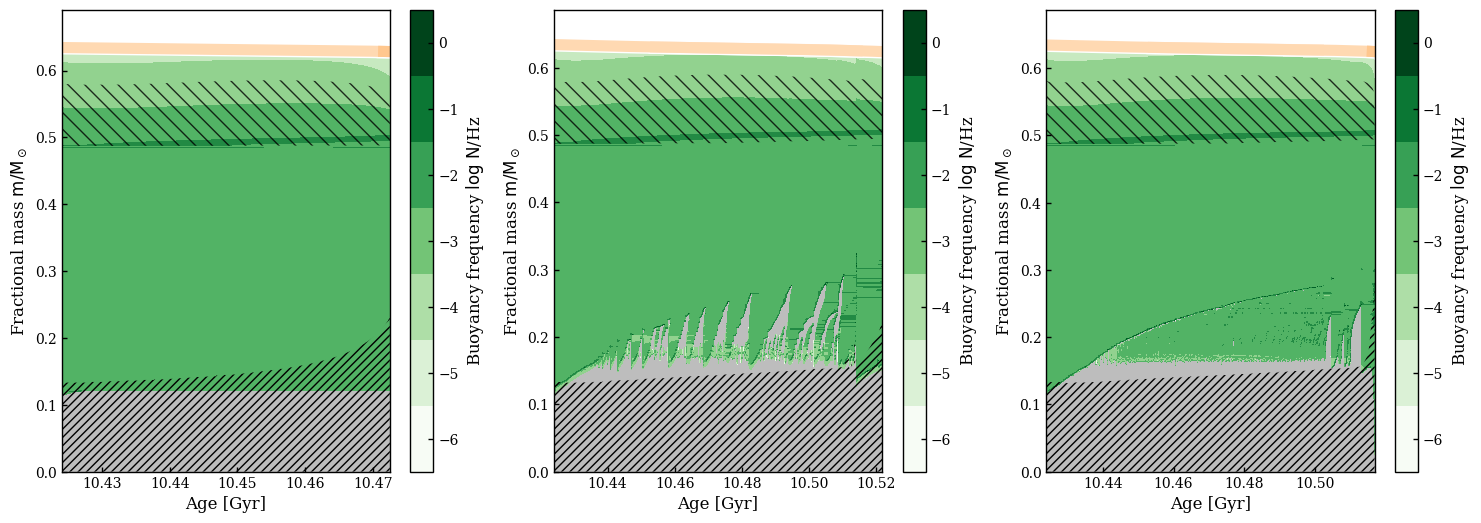

<Figure size 700x650 with 0 Axes>

<Figure size 700x650 with 0 Axes>

<Figure size 700x650 with 0 Axes>

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
rrl2_ledoux.plot_kippenhahn(ax=axs[0])
rrl2_step01.plot_kippenhahn(ax=axs[1])
rrl2_premix.plot_kippenhahn(ax=axs[2])

In [64]:
f24 = [806, 961, 1165]

f24_og = [1188, 1183, 2367, 1246, 1386, 1225]


C:\Users\mkoro\AppData\Local\Temp\ipykernel_24820\1732075446.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,55)
C:\Users\mkoro\AppData\Local\Temp\ipykernel_24820\1732075446.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


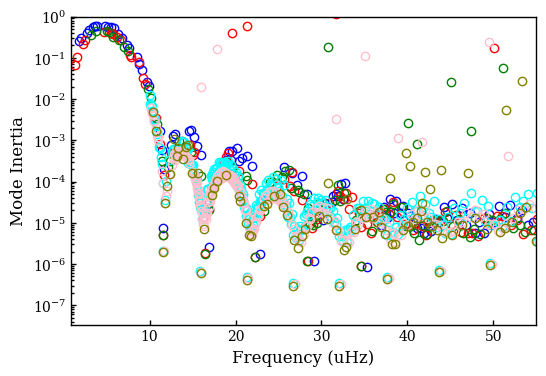

In [75]:
rrl2_ledoux.plot_mode_inertia(f24[0])
rrl2_step01.plot_mode_inertia(f24[1], ca='red')
rrl2_premix.plot_mode_inertia(f24[2], ca='green')

nv_ledoux.plot_mode_inertia(f24_og[0], ca='cyan',  dir='profs_combined_gamma',  filelabel='')
ov_f1.plot_mode_inertia(f24_og[3], ca='pink', dir='profs_gamma_combined',  filelabel='')
nv_premix.plot_mode_inertia(f24_og[2], ca='olive', dir='profs_gamma_combined',  filelabel='')

plt.xlim(0,55)
plt.ylim(0, 1)
plt.xscale('linear')

C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tomso\utils.py:176: RuntimeWarning: invalid value encountered in divide
  def grad_r(self): return 3*self.kappa*self.P*self.L_r/(64.*np.pi*sigma_SB*self.G*self.m*self.T**4)


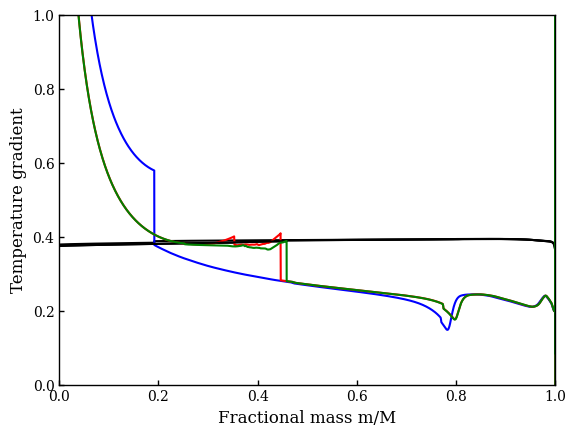

In [12]:
rrl2_ledoux.plot_nablas(f24[0], ylim1=[0,1], colors=[None, 'black', 'blue'], legend=False)
rrl2_step01.plot_nablas(f24[1], ylim1=[0,1], colors=[None, 'black', 'red'], legend=False)
rrl2_premix.plot_nablas(f24[2], ylim1=[0,1], colors=[None, 'black', 'green'], legend=False)

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1368: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


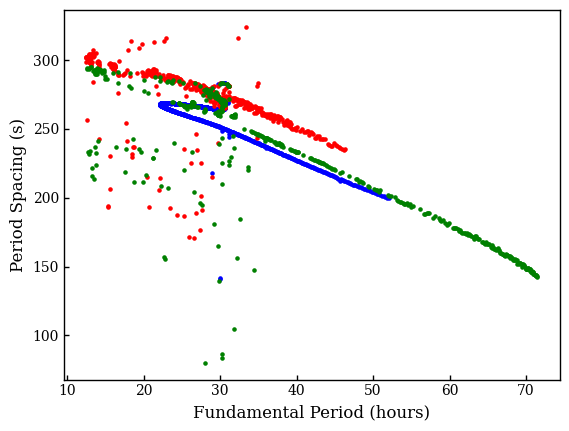

In [20]:
rrl2_ledoux.plot_pg_vs_fundamental(c='blue', nad=True)
rrl2_step01.plot_pg_vs_fundamental(c='red', nad=True)
rrl2_premix.plot_pg_vs_fundamental(c='green', nad=True)
plt.show()

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1334: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = [1/(float(f['Re(freq)']) * 10**-6) / 3600][0]


(0.0, 0.4929133840209218)

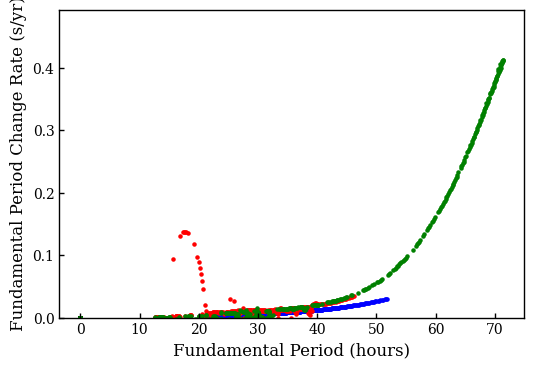

In [41]:
rrl2_ledoux.plot_pg_rate_vs_fundamental(c='blue')
rrl2_step01.plot_pg_rate_vs_fundamental(c='red')
rrl2_premix.plot_pg_rate_vs_fundamental(c='green')
plt.ylim(0,)

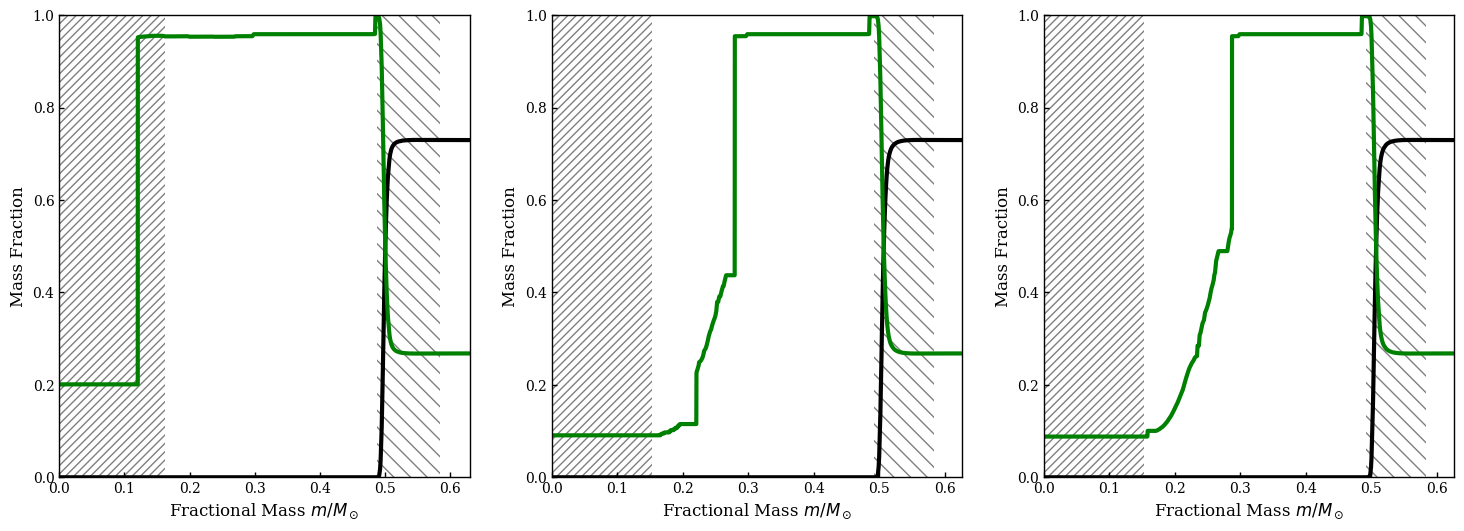

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

rrl2_ledoux.plot_composition_mass(f24[0], ax=axs[0])
rrl2_step01.plot_composition_mass(f24[1], ax=axs[1])
rrl2_premix.plot_composition_mass(f24[2], ax=axs[2])

In [52]:
rrl2_ledoux.get_frequencies(f24[0], label='-gmode')

,E_norm,Re(freq),Im(freq),l,n_g,n_p,n_pg
0,7.681683e-06,11.577994,0.0,0,0,1,1
1,2.547313e-06,16.877129,0.0,0,0,2,2
2,1.718314e-06,22.882472,0.0,0,0,3,3
3,1.192599e-06,29.094004,0.0,0,0,4,4
4,8.598005e-07,35.288181,0.0,0,0,5,5
...,...,...,...,...,...,...,...
193,6.028465e-06,276.362220,0.0,1,14,45,32
194,3.094039e-06,281.334457,0.0,1,13,45,33
195,2.685190e-06,285.753653,0.0,1,13,46,34
196,1.917354e-06,289.896148,0.0,1,13,47,35


In [66]:
colors = ['#264653', '#287271', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']

C:\Users\mkoro\AppData\Local\Temp\ipykernel_21144\1510493888.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,55)
C:\Users\mkoro\AppData\Local\Temp\ipykernel_21144\1510493888.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


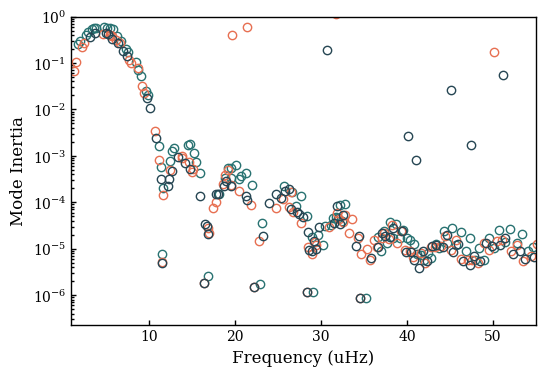

In [75]:
rrl2_ledoux.plot_mode_inertia(f24[0], ca=colors[1], cb=colors[3])
rrl2_step01.plot_mode_inertia(f24[1], ca=colors[5], cb=colors[4])
rrl2_premix.plot_mode_inertia(f24[2], ca=colors[0], cb=colors[5])

plt.xlim(0,55)
plt.ylim(0, 1)
plt.xscale('linear')

c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1782: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) # seconds
c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1796: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dipole_g.loc[mode[0], 'dP'] = dP
c:\Users\mkoro\Research\RR Lyrae\RRLyr (Fall 2024)\mesa_methods.py:1798: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b.--"

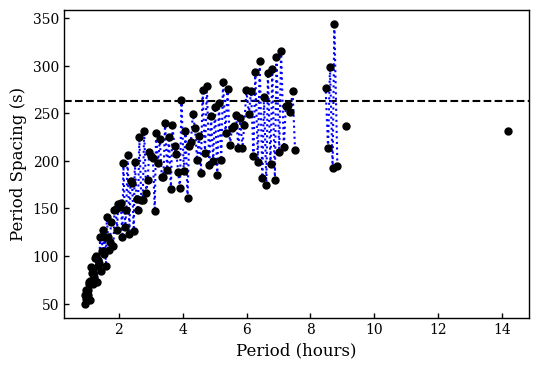

In [37]:
rrl2_ledoux.plot_period_spacing_NEWANDIMPROVED(f24[0], label='-gmode')
# rrl2_step01.plot_period_spacing_NEWANDIMPROVED(f24[1], label='-gmode')
# rrl2_premix.plot_period_spacing_NEWANDIMPROVED(f24[2], label='-gmode')

In [12]:
eigs_premix = rrl2_premix.get_eigenfunctions(1165)

100%|██████████| 175/175 [00:15<00:00, 11.05it/s]


In [13]:
eigs_ledoux = rrl2_ledoux.get_eigenfunctions(806)

100%|██████████| 198/198 [00:17<00:00, 11.55it/s]


In [14]:
eigs_step01 = rrl2_step01.get_eigenfunctions(961)

100%|██████████| 158/158 [00:12<00:00, 12.90it/s]


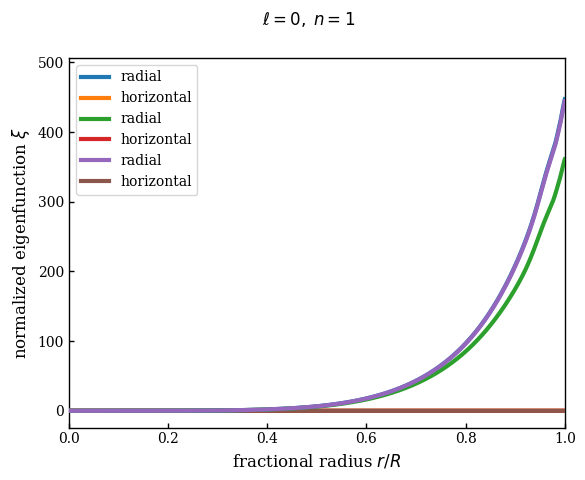

In [15]:
rrl2_premix.plot_eigenfunctions(eigs_premix, 0, 1)
rrl2_ledoux.plot_eigenfunctions(eigs_ledoux, 0, 1)
rrl2_step01.plot_eigenfunctions(eigs_step01, 0, 1)

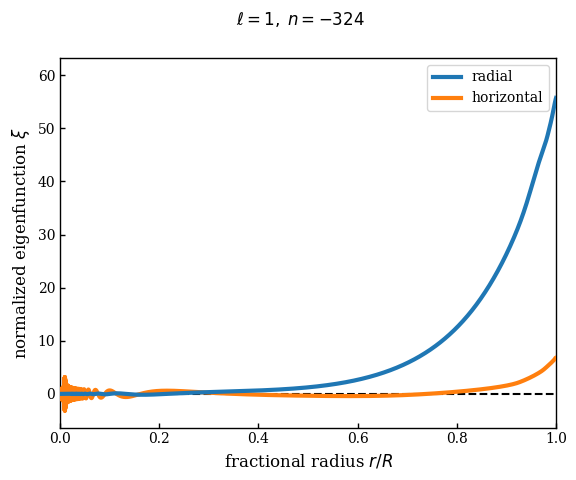

In [18]:
rrl2_premix.plot_eigenfunctions(eigs_premix, 1, -324)

(-0.1, 0.1)

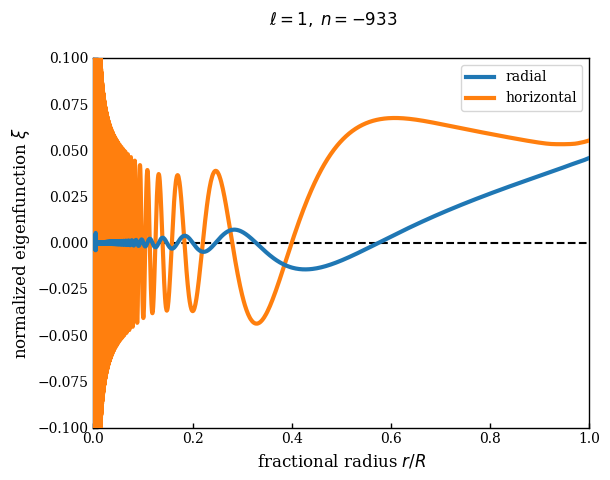

In [23]:
rrl2_step01.plot_eigenfunctions(eigs_step01, 1, -933)
plt.ylim(-0.1, 0.1)

In [16]:
# plot_eigs(eigs_premix, 1, -324)
# plot_eigs(eigs_premix, 0,1)

# plot_eigs(eigs_step01, 1, -933)
# plot_eigs(eigs_step01, 0,1)

# plot_eigs(eigs_ledoux, 0, 1)

NameError: name 'plot_eigs' is not defined